In [33]:
import random

In [34]:
import numpy as np

In [361]:
x_axis,y_axis

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
 array([ -4,   7,   1,   4,   9,  13,  14,   6,   4,   6,  15,  10,  19,
          9,  13,  17,  17,  26,  19,  24,  18,  17,  16,  26,  26,  26,
         31,  19,  23,  25,  26,  27,  35,  26,  41,  31,  42,  44,  36,
         47,  46,  42,  42,  37,  40,  53,  54,  47,  45,  39,  55,  48,
         50,  46,  62,  47,  52,  57,  59,  65,  55,  51,  53,  67,  58,
         59,  74,  57,  75,  60,  64,  64,  62,  76,  70,  66,  81,  74,
         87,  74,  85,  89,  81,  82,  92,  90,  79,  79,  79,  84,  84,
         95,  87,  85,  93,  97,  87,  

In [362]:
x_axis,y_axis = np.arange(0,100),np.arange(0,100)+np.random.randint(-10,10,100)

In [5]:
import matplotlib.pyplot as plt

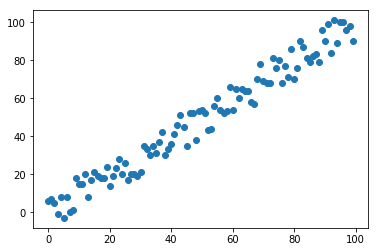

In [363]:

plt.scatter(x_axis,y_axis)


In [31]:
def func(x_axis, k, b): return k * x + b 

In [97]:
def loss(y_list, yhat_list):
#     print(y_list,yhat_list)
    return np.mean(np.abs(y_list -yhat_list))

In [200]:
def random_choose_method():
    k_best = 0
    b_best = 0
    error_best = 1e10
    loop = 100
    while loop > 0 :
        k = random.random()*2-1
        b= random.random()*20
        error = loss(y_axis,func(x_axis,k,b))
        if error<error_best:
            error_best = error
            k_best = k
            b_best = b
        loop -= 1
    return (k_best,b_best,error_best)
        

In [214]:

def supervised_direction_method ():
    k_best=random.random()*2-1
    b_best=random.random()*100-50
    k_step = 0.05
    b_step = 2
    error_best = 1e10
    directions = ((1,-1),(-1,1),(1,1),(-1,-1))
    pre_index = -1
    loop = 100
    direction_index = random.randint(0,len(directions)-1)
    while loop >0:
        k_direction = directions[direction_index][0]
        b_direction = directions[direction_index][1]
        k = k_best + k_step*random.random()*k_direction
        b=b_best + b_step*random.random()*b_direction
        error = loss(y_axis,func(x_axis,k,b))
        if error<error_best:
            error_best = error
            k_best = k
            b_best = b
        else:
            direction_index = random.randint(0,len(directions)-1)
        loop-=1
    return (k_best,b_best,error_best)

In [336]:
def derivate_k(y, yhat, x):
    abs_values = [1 if (y_i - yhat_i) > 0 else -1 for y_i, yhat_i in zip(y, yhat)]
    return np.mean([a * -x_i for a, x_i in zip(abs_values, x)])

def derivate_b(y, yhat):
    abs_values = [1 if (y_i - yhat_i) > 0 else -1 for y_i, yhat_i in zip(y, yhat)]
    return np.mean([a * -1 for a in abs_values])
    
def gradient_descent_method():
    k_best = 0
    b_best = 0
    error_best = 1e10
    loop = 100
    def k_step(y,yhat,x):
        step = random.random()*derivate_k(y,yhat,x)
#         return step*0.05
        if abs(step)>0.05:
            if step>0:
                return 0.05
            else:
                return -0.05
        else:
            return step
    def b_step(y,yhat):
        step = random.random()*derivate_b(y,yhat)
#         return step*2
        if abs(step)>2:
            if step>0:
                return 2
            else:
                return -2
        else:
            return step
    while loop > 0 :
        k_best -= k_step(y_axis,func(x_axis,k_best,b_best),x_axis)
        b_best -= b_step(y_axis,func(x_axis,k_best,b_best))
        loop -= 1
    return (k_best,b_best,loss(y_axis,func(x_axis,k_best, b_best)))

In [190]:
def show_result(method):
    k,b,er = method()
    print( k,b,er)
    plt.plot([0,100],[b,100*k+b])
    plt.scatter(x_axis,y_axis)
    plt.show()

0.9499185150207753 4.133032451033534 38.02327015548019


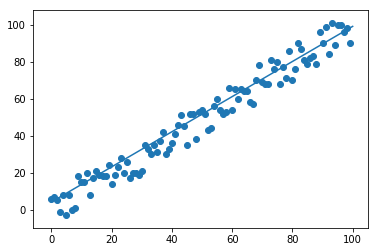

In [379]:
show_result(gradient_descent_method)

0.8975483042391588 1.3572090964396488 48.070337121599714


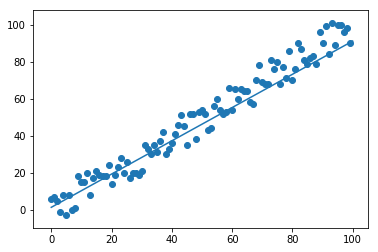

In [377]:
show_result(random_choose_method)

0.9727610025999582 0.6862724818061507 31.916753301971152


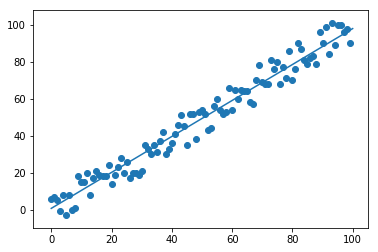

In [366]:
show_result(supervised_direction_method)